In [1]:
import requests # library for http requests
from bs4 import BeautifulSoup # module for web scrapping
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://www.worldometers.info/coronavirus/'

In [2]:
# making a request to the website
r = requests.get(url)
#print(r.text) # text gets the HTML code

# parsing HTML code to beautifulsoup
html = r.text 
soup = BeautifulSoup(html, 'html.parser')

In [3]:
# Extracting some data from HTML code
# print(soup.title.text) # the extra .text removes the HTML tags
#print(liveData)
#for x,i in enumerate(liveData):
  #3 print(i.text)    
    
countryNames = []
totalCases = []
newCases = []
totalDeaths = []
newDeaths = []
recovered = []
activeCases = []
headers = ['Country', 'Active Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Recovered', 'Total Cases']

tableBody = soup.find('tbody')
tableRows = tableBody.find_all('tr')
i = 0
for tr in tableRows:
    i += 1
    if i >= 9:
        td = tr.find_all('td')
        countryNames.append(td[0].text)
        totalCases.append(td[1].text)
        newCases.append(td[2].text)
        totalDeaths.append(td[3].text)
        newDeaths.append(td[4].text)
        recovered.append(td[5].text)
        activeCases.append(td[6].text)

In [4]:
indices = [i for i in range(1, len(countryNames) + 1)]
df = pd.DataFrame(list(zip(countryNames, activeCases, newCases, totalDeaths, newDeaths, recovered, totalCases)), columns = headers, index = indices)
df.head(len(df))

,Country,Active Cases,New Cases,Total Deaths,New Deaths,Recovered,Total Cases
1,USA,"504,002","+25,078","21,969","+1,392","31,986","557,957"
2,Spain,"86,623","+3,100","17,113",+507,"62,391","166,127"
3,Italy,"102,253","+4,092","19,899",+431,"34,211","156,363"
4,France,"91,012","+2,937","14,393",+561,"27,186","132,591"
5,Germany,"64,263","+2,122","3,011",+140,"60,300","127,574"
...,...,...,...,...,...,...,...
208,Papua New Guinea,2,,,,,2
209,Timor-Leste,1,,,,1,2
210,Saint Pierre Miquelon,1,,,,,1
211,Yemen,1,,,,,1


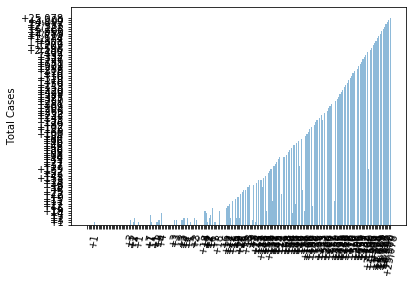

In [6]:
# Plotting 
y_pos = [i for i in range(1, len(countryNames) + 1)]

plt.bar(y_pos, newCases[::-1], align = 'center', alpha = 0.5)
plt.xticks(y_pos, newCases[::-1], rotation = 80)
plt.ylabel('Total Cases')
plt.savefig('ddd',dpi = 1200)
plt.show()